In [1]:
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from utils.experiments import *
from config import FIGURE_DIR
from config import TABLE_DIR

In [2]:
dRSB_df = pd.read_csv('tables/dynamic_rsb.csv').set_index(['d','p'])

In [3]:
dRSB_df

,,lower_estimate,upper_estimate,complexity
d,p,,,
3,1,0.379282,0.379022,4.281383e-03
4,1,0.258607,0.258324,2.605181e-02
5,1,0.274162,0.274022,3.263604e-02
6,1,0.221918,0.221826,6.145769e-02
7,1,0.231367,0.230668,6.445768e-02
8,1,0.200898,0.200108,9.099833e-02
9,1,0.206524,0.205474,8.999146e-02
10,1,0.186554,0.185759,1.054074e-01
3,2,0.198881,0.201735,1.087216e-08


In [4]:
res = []
for p in Path(f'results/1RSB-identify-sRSB').glob('*'):
    print(p)
    a = load_pickle(p)
    k = str(p).split('/')[-1]
    d = int(k.split('_')[0])
    p = int(k.split('_')[1])
    try:
        rho_temp = float(k.split('_')[3])
    except:
        print('no')
        continue
    
    res.append({
        **a,
        'd': d,
        'p': p,
        'rho_temp': rho_temp
    })

df = pd.DataFrame(res)
df['rho'] = df.observables.apply(lambda x: x[0] * 2 - 1)
df.columns

results/1RSB-identify-sRSB/6_1_1000000_8.4444_2951.pkl
results/1RSB-identify-sRSB/5_2_1000000_9.2222_14923.pkl
results/1RSB-identify-sRSB/6_1_1000000_9.5556_3670.pkl
results/1RSB-identify-sRSB/4_3_1000000_11.0222_1599.pkl
results/1RSB-identify-sRSB/8_1_1000000_11.0000_669.pkl
results/1RSB-identify-sRSB/5_1_1000000_8.3500_19725.pkl
results/1RSB-identify-sRSB/4_1_1000000_8.7333_11227.pkl
results/1RSB-identify-sRSB/6_1_1000000_8.2222_12089.pkl
results/1RSB-identify-sRSB/7_2_1000000_10.6667_16460.pkl
results/1RSB-identify-sRSB/7_1_1000000_9.1111_22115.pkl
results/1RSB-identify-sRSB/5_1_1000000_8.7833_23290.pkl
results/1RSB-identify-sRSB/9_1_1000000_10.0000_21914.pkl
results/1RSB-identify-sRSB/7_1_1000000_10.0000_26864.pkl
results/1RSB-identify-sRSB/4_2_1000000_12.0000_25663.pkl
results/1RSB-identify-sRSB/8_1_1000000_10.0000_10205.pkl
results/1RSB-identify-sRSB/3_1_1000000_6.4000_10579.pkl
results/1RSB-identify-sRSB/9_1_1000000_9.0000_14511.pkl
results/1RSB-identify-sRSB/6_2_1000000_10.8889

Index(['observables', 'entropy', 'complexity', 'observables_std',
       'entropy_std', 'complexity_std', 'observables_all', 'entropy_all',
       'complexity_all', 'd', 'p', 'rho_temp', 'rho'],
      dtype='object')

In [5]:
import numpy as np
import matplotlib.pyplot as plt

results = {}

for (d, p), g in df.groupby(['d', 'p']):
    
    grouped = g.groupby('rho_temp').agg({
    'rho': ['mean', 'sem'],
    'complexity': ['mean', 'sem']
}).reset_index()
    
    grouped.columns = ['rho_temp', 'rho', 'rho_sem', 'complexity', 'complexity_sem']
    
    x = grouped['rho']
    y = grouped['complexity']

    # Fit a quadratic model (degree 2 polynomial: ax^2 + bx + c)
    coeffs = np.polyfit(x, y, 2)  # Returns [a, b, c]

    # Find where complexity = 0 by solving ax^2 + bx + c = 0
    roots = np.roots(coeffs)  # Solve for rho

    # Filter and sort real roots
    real_roots = sorted([r.real for r in roots if np.isreal(r)])

    # Select the smallest real root
    rho_zero = real_roots[0] if real_roots else None
    results[(d, p)] = rho_zero

In [6]:
print('p,d,quadratic fit, argmin_m(complexity > 0 ), argmax_m(complexity < 0)')

for (p,d), g in df.sort_values(['p','d']).groupby(['p','d']):
    #g.groupby('rho_temp').mean().plot.scatter('rho','entropy')
    
    g = g.groupby('rho_temp')[['complexity','rho']].mean().reset_index()
    
    min_rho = g[g.complexity>0].rho.min()
    max_rho = g[g.complexity<0].rho.max()
    print(p,d,results[(d,p)],min_rho, max_rho, )


p,d,quadratic fit, argmin_m(complexity > 0 ), argmax_m(complexity < 0)
1 3 0.37583961724464765 0.3780453203651889 0.3750398732199896
1 4 0.25000698928419085 0.2512974480396339 0.2497818566887555
1 5 0.2629918293483854 0.2635654849083663 0.2609529236808904
1 6 0.20602057938347457 0.2082258942887019 0.2058420257423009
1 7 0.21343127368294706 0.21409215815137803 0.21155078377341346
1 8 0.17945530966418033 0.17988120915416692 0.17860302206649542
1 9 0.18463491505419516 0.1859559691725848 0.18364951353769476
1 10 0.1611898552035405 0.16208318645626765 0.16090514212509155
2 3 0.1914077194792172 0.19226397731741574 0.18599845475696117
2 4 0.06393312790779816 0.06829536571501667 0.06351546610499537
2 5 0.06300585111861226 0.06358460195979096 0.056074004194254054
2 6 0.015261424950503373 0.0168791661562381 0.013154475880376614
2 7 0.042079593205015295 nan -0.09748979108538258
3 3 -0.48554229525985293 0.11424966429470129 -0.5008765457901904
3 4 -0.10423519827538885 -0.01237315967256658 nan


In [8]:
rows = []

for (p, d), g in df.sort_values(['p', 'd']).groupby(['p', 'd']):
    g = g.groupby('rho_temp')[['complexity','rho']].mean().reset_index()
    
    min_rho = g[g.complexity > 0].rho.min()
    max_rho = g[g.complexity < 0].rho.max()
    quad_fit = results.get((d, p), None)
    
    rows.append({
        'p': p,
        'd': d,
        'quad_fit': quad_fit,
        'lower_estimate': min_rho,
        'upper_estimate': max_rho
    })

summary_df = pd.DataFrame(rows)
summary_df.to_csv('tables/static_rsb.csv', index=False)

In [9]:
p = 1
res = []
for p in Path(f'results/rs_p={p}').glob('*'):
    a = load_pickle(p)
    res.append(a)

dfa = pd.DataFrame(res)
dfa = dfa[dfa.converged]
dfa =dfa[dfa.d>2]
dfa=dfa[dfa.p==1]
df_RS = dfa

/tmp/ipykernel_315295/1101923387.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = f[f.mag_init>=min(x)][f.mag_init<=m_init+0.01]
/tmp/ipykernel_315295/1101923387.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = f[f.mag_init>=min(x)][f.mag_init<=m_init+0.01]
/tmp/ipykernel_315295/1101923387.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = f[f.mag_init>=min(x)][f.mag_init<=m_init+0.01]
/tmp/ipykernel_315295/1101923387.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = f[f.mag_init>=min(x)][f.mag_init<=m_init+0.01]
/tmp/ipykernel_315295/1101923387.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = f[f.mag_init>=min(x)][f.mag_init<=m_init+0.01]
/tmp/ipykernel_315295/1101923387.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = f[f.mag_init>=min(x)][f.mag_init<

For (d, p) = (np.int64(3), np.int64(1)), smallest rho intersecting zero: 0.3758
For (d, p) = (np.int64(4), np.int64(1)), smallest rho intersecting zero: 0.2500
For (d, p) = (np.int64(5), np.int64(1)), smallest rho intersecting zero: 0.2630
For (d, p) = (np.int64(6), np.int64(1)), smallest rho intersecting zero: 0.2060
For (d, p) = (np.int64(7), np.int64(1)), smallest rho intersecting zero: 0.2134
For (d, p) = (np.int64(8), np.int64(1)), smallest rho intersecting zero: 0.1795
For (d, p) = (np.int64(9), np.int64(1)), smallest rho intersecting zero: 0.1846
For (d, p) = (np.int64(10), np.int64(1)), smallest rho intersecting zero: 0.1612


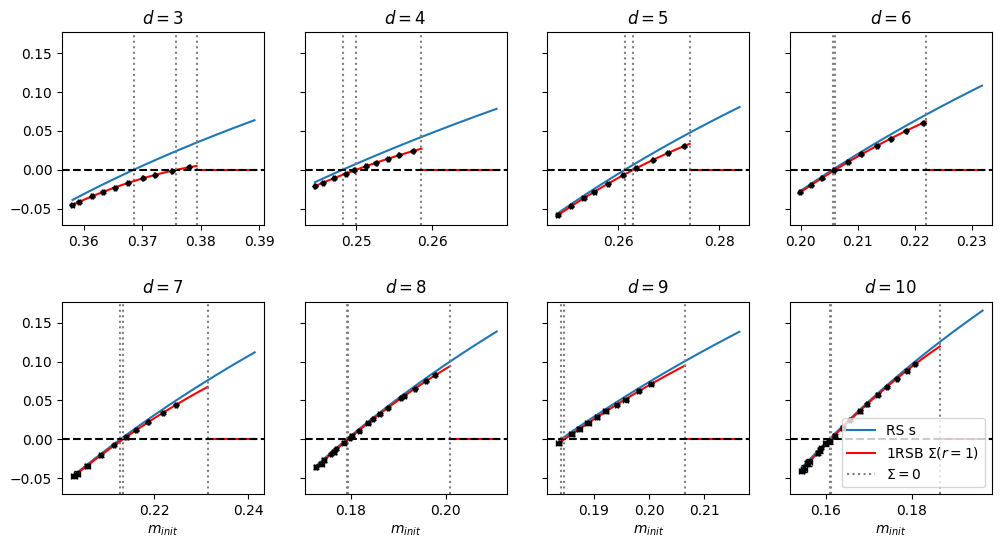

In [10]:
import numpy as np
import matplotlib.pyplot as plt

results = {}

fig, axes = plt.subplots(2,4, figsize=(12, 6),sharey=True)
plt.subplots_adjust(hspace=0.4)

for i in range(4):
    axes[1,i].set_xlabel('$m_{init}$')
axes = axes.flatten()
i = -1

for (d, p), g in df.groupby(['d', 'p']):
    if p > 1:
        continue
    i+=1
    ax = axes[i]
    grouped = g.groupby('rho_temp').agg({
    'rho': ['mean', 'sem'],
    'complexity': ['mean', 'sem']
}).reset_index()
    
    grouped.columns = ['rho_temp', 'rho', 'rho_sem', 'complexity', 'complexity_sem']
    
    x = grouped['rho']
    y = grouped['complexity']

    # Fit a quadratic model (degree 2 polynomial: ax^2 + bx + c)
    coeffs = np.polyfit(x, y, 2)  # Returns [a, b, c]

    # Find where complexity = 0 by solving ax^2 + bx + c = 0
    roots = np.roots(coeffs)  # Solve for rho

    # Filter and sort real roots
    real_roots = sorted([r.real for r in roots if np.isreal(r)])

    # Select the smallest real root
    rho_zero = real_roots[0] if real_roots else None
    
    dRSB_df_loc = dRSB_df.loc[(d,p)]
    m_init = dRSB_df_loc['lower_estimate']
    complexity = dRSB_df_loc['complexity']
    #ax.plot(m_init, complexity, color='black', label='dynamic 1RSB estimate')

    # Plot
    g_rs = df_RS[(df_RS.d == d) & (df_RS.p == p)]
    f = g_rs.sort_values('mag_init')
    f = f[f.mag_init>=min(x)][f.mag_init<=m_init+0.01]
    ax.plot(f.mag_init,f.entropy,label='RS s')
    
    rs_boundary = f[f.entropy > 0].mag_init.min()
    ax.axvline(rs_boundary, color='gray', linestyle='dotted')
    
    
    # Generate smooth curve for polynomial
    x_smooth = np.linspace(min(x), m_init, 100)
    y_smooth = np.polyval(coeffs, x_smooth)
    ax.plot(x_smooth, y_smooth, color='red', label='1RSB $\Sigma(r=1)$')
    ax.axvline(m_init, color='gray', linestyle='dotted')
    #ax.plot([m_init,m_init], [0,np.polyval(coeffs,m_init)], color='red')
    ax.plot([m_init,m_init+0.01], [0,0], color='red')
    

    ax.axhline(0, color='black', linestyle='--')

    if rho_zero is not None:
        ax.axvline(rho_zero, color='grey', linestyle=':', label=f'$\Sigma=0$')
        #ax.text(0.02, 0.95, f'{rho_zero:.4f}', transform=ax.transAxes,
        #    color='blue', ha='left', va='top', fontsize=8)
    ax.errorbar(
    grouped['rho'], grouped['complexity'],
    xerr=grouped['rho_sem'], yerr=grouped['complexity_sem'],
    fmt='.', capsize=2,  color='black'
)
    ax.set_title(f'$d={d}$')
    #plt.legend()
    #plt.show()
    
    print(f"For (d, p) = {(d, p)}, smallest rho intersecting zero: {rho_zero:.4f}" if rho_zero is not None else f"No real intersection for (d, p) = {(d, p)}")
    results[(d, p)] = rho_zero
axes[-1].legend()

plt.savefig('figures/sRSB_p=1.pdf', bbox_inches='tight')

In [11]:
res = []
for p in Path(f'results/1RSB-experiments').glob('*'):
    #print(p)
    a = load_pickle(p)
    k = str(p).split('/')[-1]
    d = int(k.split('_')[0])
    p = int(k.split('_')[1])
    try:
        rho_temp = float(k.split('_')[3])
    except:
        continue
    
    res.append({
        **a,
        'd': d,
        'p': p,
        'rho_temp': rho_temp
    })

df_precise = pd.DataFrame(res)
df_precise = df_precise[~df_precise.observables.isna()]
df_precise['rho'] = df_precise.observables.apply(lambda x: x[0] * 2 - 1)
df_precise = df_precise[df_precise.complexity < 0.01]

In [12]:
dfk = df_precise[df_precise.d==4][df_precise.p==1].groupby('rho_temp')[['complexity','rho']].mean().reset_index()
dfk_std = df_precise[df_precise.d==4][df_precise.p==1].groupby('rho_temp')[['complexity','rho']].std().reset_index()

/tmp/ipykernel_315295/2141020467.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfk = df_precise[df_precise.d==4][df_precise.p==1].groupby('rho_temp')[['complexity','rho']].mean().reset_index()
/tmp/ipykernel_315295/2141020467.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfk_std = df_precise[df_precise.d==4][df_precise.p==1].groupby('rho_temp')[['complexity','rho']].std().reset_index()


For (d, p) = (np.int64(4), np.int64(1)), smallest rho intersecting zero: 0.2500


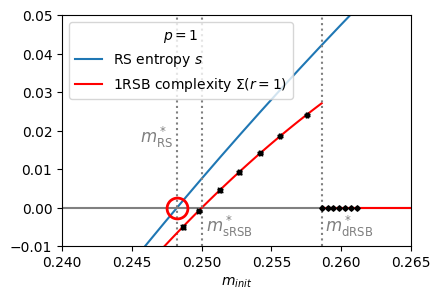

In [13]:
import numpy as np
import matplotlib.pyplot as plt

results = {}

fig, ax = plt.subplots(figsize=(4.5, 3)) 
#ax.set_ylabel('complexity $\Sigma$')
ax.set_xlabel('$m_{init}$')



for (d, p), g in df.groupby(['d', 'p']):
    if p != 1 or d != 4:
        continue
    i += 1

    grouped = g.groupby('rho_temp').agg({
        'rho': ['mean', 'sem'],
        'complexity': ['mean', 'sem']
    }).reset_index()

    grouped.columns = ['rho_temp', 'rho', 'rho_sem', 'complexity', 'complexity_sem']

    x = grouped['rho']
    y = grouped['complexity']

    # Fit a quadratic model (degree 2 polynomial)
    coeffs = np.polyfit(x, y, 2)
    roots = np.roots(coeffs)
    real_roots = sorted([r.real for r in roots if np.isreal(r)])
    rho_zero = real_roots[0] if real_roots else None

    dRSB_df_loc = dRSB_df.loc[(d, p)]
    m_init = dRSB_df_loc['lower_estimate']
    complexity = dRSB_df_loc['complexity']

    # RS entropy
    g_rs = df_RS[(df_RS.d == d) & (df_RS.p == p)]
    f = g_rs.sort_values('mag_init')
    f = f[(f.mag_init >= min(x)) & (f.mag_init <= m_init + 0.01)]
    ax.plot(f.mag_init, f.entropy, label='RS entropy $s$')
    rs_boundary = f[f.entropy > 0].mag_init.min()
    ax.axvline(rs_boundary, color='gray', linestyle='dotted')
    ax.text(rs_boundary - 0.0015, +0.015, r'$m^*_{\mathrm{RS}}$', color='gray', va='bottom', ha='center', fontsize=12)
    ax.plot([rs_boundary], [0], 'o', mfc='none', mec='red', ms=15,zorder=70,mew=2,)
    RSB_color = 'red'
    # Quadratic fit
    ax.axhline(0, color='gray')
    x_smooth = np.linspace(min(x), m_init, 100)
    y_smooth = np.polyval(coeffs, x_smooth)
    ax.plot(x_smooth, y_smooth, color=RSB_color, label='1RSB complexity $\Sigma(r=1)$')
    
    # dRSB vertical line (no legend)
    ax.axvline(m_init, color='gray', linestyle='dotted')
    ax.plot([m_init, m_init + 0.01], [0, 0], color=RSB_color)
    ax.text(m_init+ 0.002, -0.008, r'$m^*_{\mathrm{dRSB}}$', color='gray', va='bottom', ha='center', fontsize=12)

    # sRSB vertical line (no legend)
    if rho_zero is not None:
        ax.axvline(rho_zero, color='gray', linestyle=':')
        ax.text(rho_zero+ 0.002, -0.008, r'$m^*_{\mathrm{sRSB}}$', color='gray', va='bottom', ha='center', fontsize=12)

    # Data points with error bars
    ax.errorbar(
        grouped['rho'], grouped['complexity'],
        xerr=grouped['rho_sem'], yerr=grouped['complexity_sem'],
        fmt='.', capsize=2, color='black'
    )
    ax.errorbar(
        dfk['rho'], dfk['complexity'],
        xerr=dfk_std['rho'], yerr=dfk_std['complexity'],
        fmt='.', capsize=2, color='black'
    )

    #ax.set_title(f'$d={d}$')

    print(
        f"For (d, p) = {(d, p)}, smallest rho intersecting zero: {rho_zero:.4f}"
        if rho_zero is not None else
        f"No real intersection for (d, p) = {(d, p)}"
    )
    results[(d, p)] = rho_zero

ax.legend(title='$p=1$')
ax.set_ylim(-0.01, 0.05)
ax.set_xlim(0.24, 0.265)

plt.savefig('figures/RSB_d=4_zoom.pdf', bbox_inches='tight')


In [14]:
p = 2
res = []
for p in Path(f'results/rs_p={p}').glob('*'):
    a = load_pickle(p)
    res.append(a)

dfa = pd.DataFrame(res)
dfa = dfa[dfa.converged]
dfa =dfa[dfa.d>2]
dfa=dfa[dfa.p==2]
df_RS = dfa

/tmp/ipykernel_315295/867766627.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = f[f.mag_init>=min(x)][f.mag_init<=m_init+0.01]
/tmp/ipykernel_315295/867766627.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = f[f.mag_init>=min(x)][f.mag_init<=m_init+0.01]
/tmp/ipykernel_315295/867766627.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = f[f.mag_init>=min(x)][f.mag_init<=m_init+0.01]
/tmp/ipykernel_315295/867766627.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  f = f[f.mag_init>=min(x)][f.mag_init<=m_init+0.01]


For (d, p) = (np.int64(3), np.int64(2)), smallest rho intersecting zero: 0.1914
For (d, p) = (np.int64(4), np.int64(2)), smallest rho intersecting zero: 0.0639
For (d, p) = (np.int64(5), np.int64(2)), smallest rho intersecting zero: 0.0628
For (d, p) = (np.int64(6), np.int64(2)), smallest rho intersecting zero: 0.0153


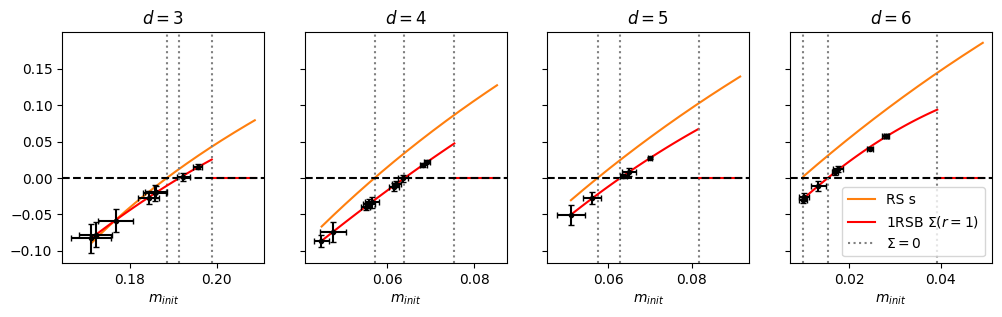

In [15]:
import numpy as np
import matplotlib.pyplot as plt

results = {}

fig, axes = plt.subplots(1,4, figsize=(12, 3),sharey=True)
plt.subplots_adjust(hspace=0.4)
axes = axes[np.newaxis, :]
for i in range(4):
    axes[0,i].set_xlabel('$m_{init}$')
axes = axes.flatten()
i = -1

for (d, p), g in df[df.d< 7].groupby(['d', 'p']):
    if p != 2:
        continue
    i+=1
    ax = axes[i]
    grouped = g.groupby('rho_temp').agg({
    'rho': ['mean', 'sem'],
    'complexity': ['mean', 'sem']
}).reset_index()
    
    
    grouped.columns = ['rho_temp', 'rho', 'rho_sem', 'complexity', 'complexity_sem']
    grouped = grouped[grouped.complexity > -0.1]
    
    x = grouped['rho']
    y = grouped['complexity']

    # Fit a quadratic model (degree 2 polynomial: ax^2 + bx + c)
    coeffs = np.polyfit(x, y, 2)  # Returns [a, b, c]

    # Find where complexity = 0 by solving ax^2 + bx + c = 0
    roots = np.roots(coeffs)  # Solve for rho

    # Filter and sort real roots
    real_roots = sorted([r.real for r in roots if np.isreal(r)])

    # Select the smallest real root
    rho_zero = real_roots[0] if real_roots else None
    
    dRSB_df_loc = dRSB_df.loc[(d,p)]
    m_init = dRSB_df_loc['lower_estimate']
    complexity = dRSB_df_loc['complexity']
    #ax.plot(m_init, complexity, color='black', label='dynamic 1RSB estimate')

    # Plot
    g_rs = df_RS[(df_RS.d == d) & (df_RS.p == p)]
    f = g_rs.sort_values('mag_init')
    f = f[f.mag_init>=min(x)][f.mag_init<=m_init+0.01]
    ax.plot(f.mag_init,f.entropy,label='RS s',c='tab:orange')
    
    rs_boundary = f[f.entropy > 0].mag_init.min()
    ax.axvline(rs_boundary, color='gray', linestyle='dotted')
    
    
    # Generate smooth curve for polynomial
    x_smooth = np.linspace(min(x), m_init, 100)
    y_smooth = np.polyval(coeffs, x_smooth)
    ax.plot(x_smooth, y_smooth, color='red', label='1RSB $\Sigma(r=1)$')
    ax.axvline(m_init, color='gray', linestyle='dotted')
    #ax.plot([m_init,m_init], [0,np.polyval(coeffs,m_init)], color='red')
    ax.plot([m_init,m_init+0.01], [0,0], color='red')
    

    ax.axhline(0, color='black', linestyle='--')

    if rho_zero is not None:
        ax.axvline(rho_zero, color='grey', linestyle=':', label=f'$\Sigma=0$')
        #ax.text(0.02, 0.95, f'{rho_zero:.4f}', transform=ax.transAxes,
        #    color='blue', ha='left', va='top', fontsize=8)
    ax.errorbar(
    grouped['rho'], grouped['complexity'],
    xerr=grouped['rho_sem'], yerr=grouped['complexity_sem'],
    fmt='.', capsize=2,  color='black'
)
    ax.set_title(f'$d={d}$')
    #plt.legend()
    #plt.show()
    
    print(f"For (d, p) = {(d, p)}, smallest rho intersecting zero: {rho_zero:.4f}" if rho_zero is not None else f"No real intersection for (d, p) = {(d, p)}")
    results[(d, p)] = rho_zero
    
axes[-1].legend()

plt.savefig('figures/sRSB_p=2.pdf', bbox_inches='tight')

In [18]:
p = 3
res = []
p = 3
res = []
for p in Path(f'results/rs_p={p}').glob('*'):
    a = load_pickle(p)
    res.append(a)

dfa = pd.DataFrame(res)
dfa = dfa[dfa.converged]
dfa =dfa[dfa.d>2]
dfa = dfa[dfa.mag_init_temp < 7]
df_RS = dfa
print(df_RS)

       mag_init  MAG_pathend  monoch_edges_pathend  mag_init_Z_ij_prime  \
3     -0.076651     0.597648              0.686437            -0.076651   
4      0.272423     0.865050              0.874156             0.272423   
5      0.116330     0.741071              0.774593             0.116330   
8      0.069884     0.738494              0.772687             0.069884   
10    -0.105681     0.591784              0.675104            -0.105681   
...         ...          ...                   ...                  ...   
48657  0.019986     0.711319              0.752988             0.019986   
48658  0.016709     0.657081              0.715878             0.016709   
48660  0.265067     0.862346              0.871820             0.265067   
48662 -0.057114     0.610890              0.686594            -0.057114   
48664 -0.083819     0.599046              0.679428            -0.083819   

       MAG_pathend_Z_ij_prime  monoch_edges_pathend_Z_ij_prime      Z_ij  \
3                    0.

For (d, p) = (np.int64(3), np.int64(3)), smallest rho intersecting zero: 0.1160
For (d, p) = (np.int64(4), np.int64(3)), smallest rho intersecting zero: -0.1042


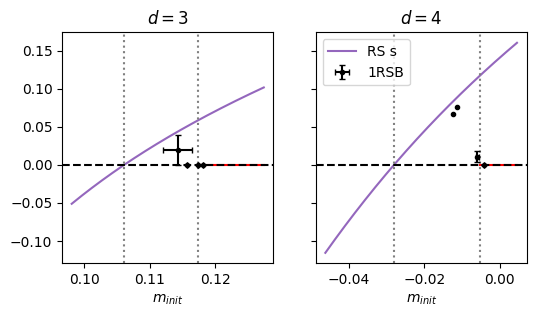

In [19]:
import numpy as np
import matplotlib.pyplot as plt

results = {}
p=3

fig, axes = plt.subplots(1,2, figsize=(6, 3),sharey=True)
plt.subplots_adjust(hspace=0.4)
axes = axes[np.newaxis, :]
for i in range(2):
    axes[0,i].set_xlabel('$m_{init}$')
axes = axes.flatten()
i = -1

for (d, p), g in df[df.d< 7].groupby(['d', 'p']):
    if p != 3:
        continue
    i+=1
    ax = axes[i]
    grouped = g.groupby('rho_temp').agg({
    'rho': ['mean', 'sem'],
    'complexity': ['mean', 'sem']
}).reset_index()
    
    
    grouped.columns = ['rho_temp', 'rho', 'rho_sem', 'complexity', 'complexity_sem']
    grouped = grouped[grouped.complexity > -0.1]
    
    x = grouped['rho']
    y = grouped['complexity']

    # Fit a quadratic model (degree 2 polynomial: ax^2 + bx + c)
    coeffs = np.polyfit(x, y, 2)  # Returns [a, b, c]

    # Find where complexity = 0 by solving ax^2 + bx + c = 0
    roots = np.roots(coeffs)  # Solve for rho

    # Filter and sort real roots
    real_roots = sorted([r.real for r in roots if np.isreal(r)])

    # Select the smallest real root
    rho_zero = real_roots[0] if real_roots else None
    
    dRSB_df_loc = dRSB_df.loc[(d,p)]
    m_init = dRSB_df_loc['lower_estimate']
    complexity = dRSB_df_loc['complexity']
    #ax.plot(m_init, complexity, color='black', label='dynamic 1RSB estimate')

    # Plot
    g_rs = df_RS[(df_RS.d == d) & (df_RS.p == p)]
    f = g_rs.sort_values('mag_init')
    f = f[f.mag_init>-0.2][f.mag_init<=m_init+0.01]
    ax.plot(f.mag_init,f.entropy,label='RS s',c='tab:purple')
    
    rs_boundary = f[f.entropy > 0].mag_init.min()
    ax.axvline(rs_boundary, color='gray', linestyle='dotted')
    
    
    # Generate smooth curve for polynomial
    x_smooth = np.linspace(min(x), m_init, 100)
    y_smooth = np.polyval(coeffs, x_smooth)
    #ax.plot(x_smooth, y_smooth, color='red', label='1RSB $\Sigma(r=1)$')
    ax.axvline(m_init, color='gray', linestyle='dotted')
    #ax.plot([m_init,m_init], [0,np.polyval(coeffs,m_init)], color='red')
    ax.plot([m_init,m_init+0.01], [0,0], color='red')
    

    ax.axhline(0, color='black', linestyle='--')

    
    ax.errorbar(
    grouped['rho'], grouped['complexity'],
    xerr=grouped['rho_sem'], yerr=grouped['complexity_sem'],
    fmt='.', capsize=2,  color='black', label='1RSB'
)
    ax.set_title(f'$d={d}$')
    #plt.legend()
    #plt.show()
    
    print(f"For (d, p) = {(d, p)}, smallest rho intersecting zero: {rho_zero:.4f}" if rho_zero is not None else f"No real intersection for (d, p) = {(d, p)}")
    results[(d, p)] = rho_zero
    
axes[-1].legend()

plt.savefig('figures/sRSB_p=3.pdf', bbox_inches='tight')